In [ ]:
import matplotlib.pyplot as plt
import pandas as pd 
import os
from scipy import stats
import numpy as np
path_data = "/content/drive/My Drive/ICIP/"
path_imgs = "/content/drive/My Drive/ICIP/train_imgs/"

In [ ]:
predicted_pop = pd.read_csv(path_data+'Predictions.csv')
popularity = pd.read_csv(path_data+'popularity_TRAIN.csv')

In [ ]:
pop=pd.DataFrame(predicted_pop['FlickrId'].values,columns=['FlickrId'])

In [ ]:
pop

,FlickrId
0,23647582388
1,23647590868
2,23647595668
3,23647611628
4,23647652398
...,...
2029,49108706176
2030,49108745182
2031,49108784117
2032,49108834372


In [ ]:
#Creating the ground truth sequence 
ground_truth=pd.merge(pop,popularity,on='FlickrId')

In [ ]:
ground_truth

,FlickrId,Unnamed: 0,Day01,Day02,Day03,Day04,Day05,Day06,Day07,Day08,Day09,Day10,Day11,Day12,Day13,Day14,Day15,Day16,Day17,Day18,Day19,Day20,Day21,Day22,Day23,Day24,Day25,Day26,Day27,Day28,Day29,Day30
0,23647582388,2,0.926886,2.846163,3.922427,4.000000,4.923045,6.846045,7.000000,7.000000,7.000000,7.000000,7.000000,7.845755,8.000000,9.000000,9.000000,9.000000,9.000000,9.845874,10.000000,10.000000,10.00000,10.000000,10.000000,11.000000,11.000000,11.000000,11.000000,11.000000,11.000000,11.000000
1,23647590868,6,0.918901,1.918530,2.917688,3.000000,3.918504,4.000000,4.836465,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.811685,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,6.00000,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000
2,23647595668,7,226.006560,291.578246,313.427762,327.851023,340.934661,353.928233,359.342110,366.000000,372.995399,376.833399,389.827533,399.992954,402.665696,405.810502,408.662705,411.833468,413.667060,414.833114,419.329707,422.833079,423.00000,428.000000,432.480747,433.816132,439.354770,440.747736,442.486608,443.000000,444.226473,446.337212
3,23647611628,11,8.342451,11.770163,13.845520,14.923328,15.000000,15.000000,15.000000,15.000000,16.846318,18.000000,19.692785,21.000000,21.000000,21.000000,21.000000,21.000000,22.000000,23.000000,23.000000,23.000000,23.00000,24.000000,25.000000,26.000000,26.000000,27.000000,27.762752,28.000000,28.000000,29.000000
4,23647652398,22,46.900149,55.554321,63.405484,65.851409,73.405562,94.364571,107.662739,110.838168,113.702521,117.000000,135.513460,146.256302,152.405134,154.656891,165.554108,170.702713,172.851412,182.662145,185.702639,189.553941,191.84842,192.851389,195.553843,201.098148,205.639217,209.000000,212.535947,216.767944,217.000000,217.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2029,49108706176,21649,8.810960,59.805437,135.896067,178.221817,196.479002,203.000000,206.678675,209.271603,211.335690,212.000000,212.989274,215.000000,215.000000,215.000000,216.000000,216.000000,217.620171,219.000000,220.000000,221.298050,222.00000,223.000000,223.000000,223.000000,223.000000,223.094623,223.802147,224.000000,226.285174,227.289598
2030,49108745182,21474,17.061063,26.685041,70.263753,86.864536,93.868548,97.579403,99.273271,101.206530,102.813334,107.383319,111.000000,111.258930,114.000000,115.254309,118.462891,122.000000,125.488262,128.000000,131.243322,132.464150,135.00000,135.236242,137.000000,137.000000,143.000000,144.285628,147.115701,148.000000,148.000000,149.000000
2031,49108784117,21698,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
2032,49108834372,21375,2.000000,2.754479,4.359016,8.000000,8.000000,8.000000,8.000000,8.250893,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,10.00000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000


In [ ]:
# cols=list(range(1,31))
# ground_truth.drop(ground_truth.columns[cols],axis=1,inplace=True)

In [ ]:
ground_truth.drop(['Unnamed: 0'],axis=1,inplace=True)

In [ ]:
predicted_pop

,FlickrId,Day01,Day02,Day03,Day04,Day05,Day06,Day07,Day08,Day09,Day10,Day11,Day12,Day13,Day14,Day15,Day16,Day17,Day18,Day19,Day20,Day21,Day22,Day23,Day24,Day25,Day26,Day27,Day28,Day29,Day30
0,23647582388,11.246192,15.290378,17.499479,18.959061,20.042852,20.819881,21.486283,22.093439,22.643715,23.128046,23.570438,23.989409,24.351071,24.682049,24.978548,25.276532,25.555040,25.801800,26.037514,26.256939,26.454163,26.637603,26.818535,26.982187,27.136619,27.284979,27.413895,27.546403,27.672325,27.799977
1,23647590868,1.691308,2.299510,2.631735,2.851241,3.014232,3.131089,3.231308,3.322618,3.405374,3.478212,3.544743,3.607752,3.662142,3.711918,3.756508,3.801321,3.843206,3.880316,3.915765,3.948764,3.978425,4.006012,4.033222,4.057834,4.081059,4.103370,4.122758,4.142686,4.161623,4.180821
2,23647595668,253.030030,344.020851,393.723818,426.563206,450.947602,468.430114,483.423606,497.084109,509.464873,520.361907,530.315370,539.741862,547.878957,555.325699,561.996667,568.701064,574.967274,580.519175,585.822539,590.759421,595.196793,599.324040,603.394861,607.076893,610.551482,613.889467,616.789974,619.771297,622.604439,625.476504
3,23647611628,0.000000,0.000000,0.000000,1.528004,4.614615,4.614615,5.450967,21.463590,24.611278,24.611278,24.611278,24.611278,24.611278,24.611278,24.611278,24.611278,24.611278,24.611278,25.592509,26.662218,26.662218,26.662218,26.662218,26.662218,27.617863,49.010650,51.273496,51.273496,51.273496,51.273496
4,23647652398,96.545650,131.263931,150.228500,162.758633,172.062696,178.733289,184.454177,189.666453,194.390433,198.548284,202.346108,205.942862,209.047637,211.889001,214.434363,216.992479,219.383403,221.501775,223.525316,225.409024,227.102139,228.676923,230.230177,231.635086,232.960844,234.234479,235.341191,236.478739,237.559747,238.655607
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2029,49108706176,6.375066,8.667570,9.919831,10.747216,11.361579,11.802049,12.179808,12.523983,12.835915,13.110465,13.361242,13.598741,13.803754,13.991374,14.159449,14.328365,14.486242,14.626121,14.759739,14.884123,14.995922,15.099908,15.202472,15.295240,15.382782,15.466882,15.539960,15.615075,15.686455,15.758817
2030,49108745182,33.696921,45.814496,52.433620,56.806959,60.054317,62.382526,64.379264,66.198482,67.847273,69.298470,70.624009,71.879369,72.963015,73.954724,74.843121,75.735970,76.570464,77.309830,78.016098,78.673561,79.264502,79.814142,80.356268,80.846617,81.309341,81.753872,82.140143,82.537177,82.914477,83.296960
2031,49108784117,1.718821,2.336917,2.674547,2.897623,3.063265,3.182023,3.283873,3.376668,3.460770,3.534793,3.602406,3.666440,3.721715,3.772300,3.817616,3.863158,3.905724,3.943438,3.979464,4.013000,4.043143,4.071179,4.098832,4.123844,4.147446,4.170121,4.189824,4.210076,4.229321,4.248831
2032,49108834372,4.629446,6.294217,7.203584,7.804414,8.250552,8.570412,8.844734,9.094667,9.321186,9.520558,9.702667,9.875134,10.024011,10.160257,10.282309,10.404973,10.519620,10.621198,10.718228,10.808553,10.889740,10.965252,11.039732,11.107098,11.170670,11.231741,11.284809,11.339356,11.391191,11.443738


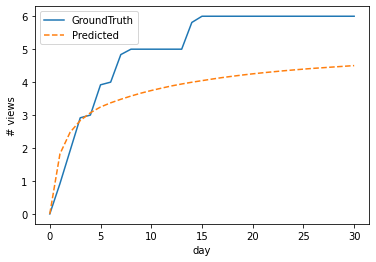

In [ ]:
x_range = np.linspace(start=1,stop=30, num=30)
true_seq = ground_truth.loc[1,'Day01':'Day30'].values
pred_seq = predicted_pop.loc[1,'Day01':'Day30'].values

plt.figure()
# Day00 is added just for visualization, NOT for the computation of the error
plt.plot([0]+list(x_range),[0]+list(true_seq))
plt.plot([0]+list(x_range),[0]+list(pred_seq),'--')

plt.legend(['GroundTruth', 'Predicted'])
plt.xlabel("day")
plt.ylabel("# views")
plt.show()

In [ ]:
def plot_data(data):
    x = np.linspace(start=1,stop=30, num=30)
    plt.figure()
    for i in range(len(data)):
        v = data.loc[i,'Day01':'Day30'].values
        # Day00 is added just for visualization
        plt.plot([0]+list(x),[0]+list(v))
    
    plt.xlabel("day")
    plt.ylabel("# views")
    plt.show()

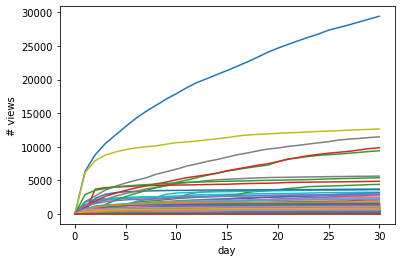

In [ ]:
plot_data(ground_truth)

In [ ]:
def evaluate_performace(predicted, gt):
    errors = []
    n_evaluated = 0
    n_testset = len(gt)

    for photo_id in predicted['FlickrId']:
        pred = predicted.loc[predicted['FlickrId'] == photo_id, 'Day01':'Day30']
        pred = pred.values[0]
        true = None
        true = gt.loc[gt['FlickrId'] == photo_id, 'Day01':'Day30']
        true = true.values[0]

        A = np.array(pred, dtype=float)
        B = np.array(true, dtype=float)

        #squared error
        SE = (A-B) ** 2
        # RMSE for the individual sequence over 30 days (from day 1 to day 30)
        e = np.sqrt(np.mean(SE))
        errors.append(e)
        n_evaluated = n_evaluated + 1

    if n_evaluated != n_testset:
        print("Some FlickrId may be duplicted or missing.")
        return []
    else:
        return errors

In [ ]:
predicted_ids = set(predicted_pop['FlickrId'])
gt_ids = set(ground_truth['FlickrId'])
if predicted_ids == gt_ids:
    
    errors = evaluate_performace(predicted_pop, ground_truth)
        
    errors = np.array(errors)
    if len(errors) > 0:
        t_RMSE = stats.trim_mean(errors, 0.25)
        print("RMSE (trimmed 0.25):\t" + str(t_RMSE))
        print("RMSE (median):\t" + str(np.median(errors)))
else:
    print("Some FlickrId may be duplicted or missing.")

RMSE (trimmed 0.25):	12.57968819897422
RMSE (median):	8.839778625291778


In [ ]:
pd.DataFrame(errors).describe()

,0
count,2034.000000
mean,90.377899
std,573.354564
min,0.117841
25%,3.007647
50%,8.506830
75%,41.189596
max,19348.863985


In [ ]:
q1 = np.percentile(errors,25)
q3 = np.percentile(errors,75)

filtered_err = [x for x in errors if x>=q1 and x<=q3]
pd.DataFrame(filtered_err).describe()

,0
count,1016.000000
mean,12.045323
std,9.480929
min,2.901098
25%,4.783224
50%,8.256098
75%,16.461960
max,42.100028


([<matplotlib.axis.XTick at 0x7fa0cbae6240>], [Text(0, 0, 'filtered errors')])

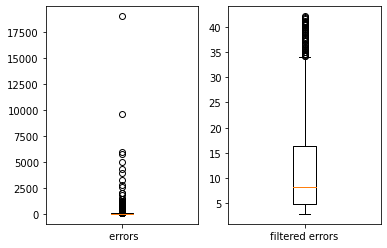

In [ ]:
plt.figure()
plt.subplot(121)
plt.boxplot(errors)
plt.xticks([1], [' errors'])

plt.subplot(122)
plt.boxplot(filtered_err)
plt.xticks([1], ['filtered errors'])